In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [318]:
import numpy as np
import math
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

Let

$
z = w^Tx = w_0 + w_1x_1 + w_2x_2 + \dots w_p x_p\\
g(z) = \dfrac{1}{1+e^{-z}}\\
$

then our logistic regression model is given by: 

$
h_w(x)= g(w^Tx)
$

We could proceed as for linear regression by using the mean-squared error as our loss function. Unfortunately because of the non-linear nature of the sigmoid function, this loss function is not convex and so there are many local optima. This is a problem for gradient descent algorithm as it may not converge to the global minimum. Cross-entropy loss measures the performance of a classifier that outputs a 0 or 1. For a single training example (x,y) we define this as: 

$
\mathcal{L}(h_w, y) = 
     \begin{cases}
       -\text{log}(h_w(x)) \quad\text{if }y=1\\
       -\text{log}(1 - h_w(x)) \quad\text{if }y=0\\
     \end{cases}
$

We can plot these loss functions for y = 0 and y = 1

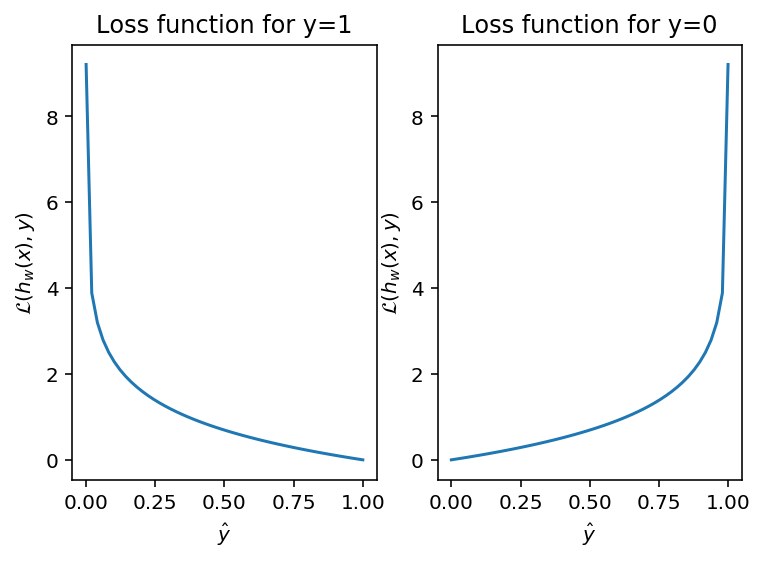

In [6]:
h_w = np.linspace(0.0001, 0.9999, 50)
cost_y1 = -np.log(h_w)
cost_y0 = -np.log(1-h_w)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.set_title("Loss function for y=1")
ax.set_xlabel(r"$\hat{y}$")
ax.set_ylabel(r"$\mathcal{L}(h_w(x), y)$")
ax.plot(h_w, cost_y1)

ax = axs[1]
ax.set_title("Loss function for y=0")
ax.set_xlabel(r"$\hat{y}$")
ax.set_ylabel(r"$\mathcal{L}(h_w(x), y)$")
ax.plot(h_w, cost_y0)

We can see that when the prediction is close the actual value of y then the loss functions are small. Conversly when the predictions are far from the actual y values then the loss is large. Therefore, we are penalised more when our predictions are further from the truth!

It is actually possible to rewrite the loss function above as a single function as follows:

$
\mathcal{L}(h_w, y) =-y\,\text{log}(h_w(x)) - (1-y)\text{log}(1 - h_w(x))
$

The above accounts for the loss for a single training example, we define a cost funtion $\mathcal{J}$ that is the average loss across all the training examples:

$
\mathcal{J}(w) =-\frac{1}{N}\sum_{i=0}^{N}\left[{y^{(i)}\,\text{log}(h_w(x^{(i)})) + (1-y^{(i)})\,\log(1 - h_w(x^{(i)}))}\right]
$

where $x^{(i)}$ represents the $i^{th}$ training example. Our goal then is to find the $w$ values that minimise $\mathcal{J}$. We will do this using gradient descent approach and for this the first thing we need to compute the deriviative $\mathcal{J}$ with respect to our weights $w_j$. 

In the following steps, we will use the notation $wx^{i}$ to mean $w_0 + w_1x_1^{i} + w_2x_2^{i} + \dots + w_px_p^{i}$

We can simplify $\mathcal{J}(w)$ by noting that:


$
\begin{align}
\log(h_w(x^{i})) &= \log \left( \dfrac{1}{1+e^{-wx^{i}}}\right)\\
&= \log(1) - \log(1+e^{-wx^{i}})\\
&= - \log(1+e^{-wx^{i}})
\end{align}
$

and

$
\begin{align}
\log(1 - h_w(x^{i})) &= \log \left( 1 - \dfrac{1}{1+e^{-wx^{i}}}\right)\\
&=\log\left(\dfrac{e^{-wx^{i}}}{1 + e^{-wx^{i}}}\right)\\
&=\log\left( e^{-wx^{i}} \right) - \log\left( 1 + e^{-wx^{i}} \right)\\
&=-wx^{i} - \log\left(1 + e^{-wx^{i}}\right)
\end{align}
$

Substituting these results back into $\mathcal{J}(w)$:

$
\begin{align}
\mathcal{J}(w) &= \dfrac{1}{N} \sum_{i=0}^{N} \left[ y^{i}\log\left( 1 + e^{-wx^{i}}\right) + (1-y^{i})\left( wx^{i} + \log\left( 1 + e^{-wx^{i}} \right)\right)\right]\\
&= \dfrac{1}{N} \sum_{i=0}^{N} \left[ y^{i}\log\left( 1 + e^{-wx^{i}}\right) + wx^{i} + \log\left( 1 + e^{-wx^{i}} \right) -y^{i}wx^{i} -y^{i}\log\left( 1 + e^{-wx^{i}} \right) \right]\\
&= \dfrac{1}{N} \sum_{i=0}^{N} \left[ wx^{i} + \log\left( 1 + e^{-wx^{i}} \right) -y^{i}wx^{i} \right]\\
\end{align}
$

Then by writing $wx^{i}$ as $\log\left( e^{wx^{i}}\right)$ we get: 

$
\begin{align}
\mathcal{J}(w) &= \dfrac{1}{N} \sum_{i=0}^{N} \left[ \log\left( e^{wx^{i}}\right) + \log\left( 1 + e^{-wx^{i}} \right) -y^{i}wx^{i} \right]\\
\end{align}
$

and then using $\log\left(a\right) + \log\left(b\right) = \log \left( ab\right)$:

$
\begin{align}
\mathcal{J}(w) &= \dfrac{1}{N} \sum_{i=0}^{N} \left[ \log\left( 1 + e^{wx^{i}} \right) -y^{i}wx^{i} \right]\\
\end{align}
$

Then we need to find the deriviatives:

$
\begin{align}
&\frac{\partial}{\partial w_j }\log\left( 1 + e^{wx^{i}} \right) = \dfrac{x_j^{i}e^{wx^{i}}}{1 + e^{wx^{i}}} = x_j^{i} h_{w}\left( x^{\left(i\right)}\right)\\
&\frac{\partial}{\partial w_j }y^{i}wx^{i} = y^{i}x_{j}^{i}
\end{align}
$

Therefore, we have:

$
\begin{align}
\frac{\partial \mathcal{J}\left(w\right)}{\partial w_j } &= \dfrac{1}{N} \sum_{i=0}^{N} x_j^{i} h_{w}\left( x^{\left(i\right)}\right) - y^{i}x_{j}^{i} \\
&= \dfrac{1}{N} \sum_{i=0}^{N} \left(h_{w}( x^{\left(i\right)}) - y^{i}\right)x_j^{i}
\end{align}
$

So our weight update rule via gradient descent is then: 

$
\begin{align}
w_j := w_j - \dfrac{\alpha}{N} \sum_{i=0}^{N} \left(h_{w}( x^{\left(i\right)}) - y^{i}\right)x_j^{i}
\end{align}
$

Next, let's build a python function to compute the cost function at each step of gradient descent:

$
\mathcal{J}(w) =-\frac{1}{N}\sum_{i=0}^{N}\left[{y^{(i)}\,\text{log}(h_w(x^{(i)})) + (1-y^{(i)})\,\log(1 - h_w(x^{(i)}))}\right]
$

$
\begin{align}
w_j := w_j - \dfrac{\alpha}{N} \sum_{i=0}^{N} \left(h_{w}( x^{\left(i\right)}) - y^{i}\right)x_j^{i}
\end{align}
$

In [330]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict(features, weights):
    return sigmoid(np.dot(features, weights.T))


def compute_cost(features, labels, weights):
    n_obs = len(features)
    predictions = predict(features, weights)
    y1_cost = labels * np.log(predictions)
    y0_cost = (1 - labels) * np.log(1 - predictions)
    total_cost = -(y1_cost + y0_cost).sum()
    return total_cost / n_obs


def update_weights(features, labels, weights):
    alpha = 0.01
    predictions = predict(features, weights)
    gradient = np.dot(features.T, predictions - labels)/len(features)
    return weights - alpha * gradient


def gradient_descent(features, labels):
    # pick a random w to start
    D = features.shape[1]
    w = np.random.randn(D) * 1 / np.sqrt(D)
    costs = []

    for i in range(2000):
        cost = compute_cost(features, labels, w)
        w = update_weights(features, labels, w)
        costs.append(cost)
    return costs, w


def create_fake_data():
    X, y = make_blobs(n_samples=1000, centers=2, cluster_std=2, random_state=22)
    X = np.c_[np.ones(len(X)), X]
    return X, y

Create some fake data that we want to classify

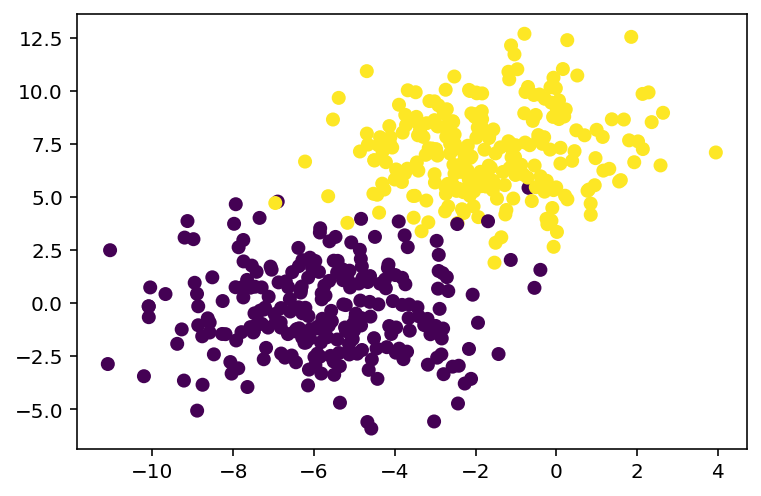

In [331]:
X,y = create_fake_data()

X_train = X[0:500]
y_train = y[0:500]

X_test = X[500:]
y_test = y[500:]

plt.scatter(X_train[:,1], X_train[:,2], c=y_train)

In [332]:
costs, w_learnt = gradient_descent(X_train, y_train)

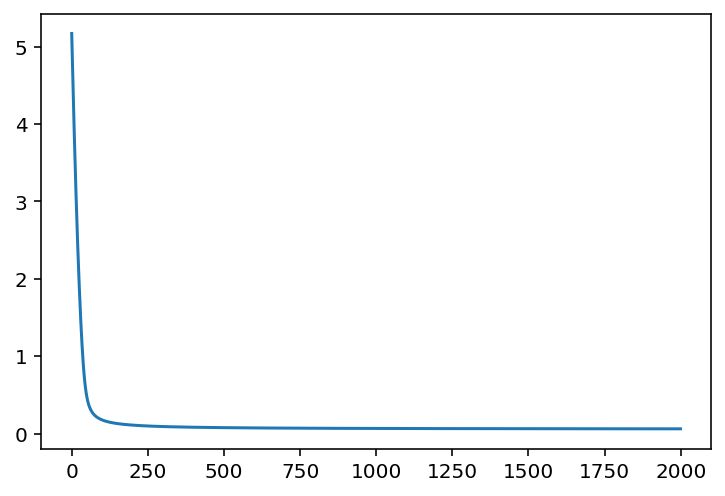

In [333]:
plt.plot(costs)

In [334]:
binarize = np.vectorize(decision_boundary)
predictions = binarize(predict(X_test, w_learnt)).flatten()

In [335]:
accuracy_score(y_test.flatten(), predictions)

0.98

In [336]:
w_learnt

array([-0.51633016,  0.8996392 ,  1.13602476])

In [341]:
def get_points_on_line(x, w):
    return (w[0] + (w[1] * x))/-w[2]

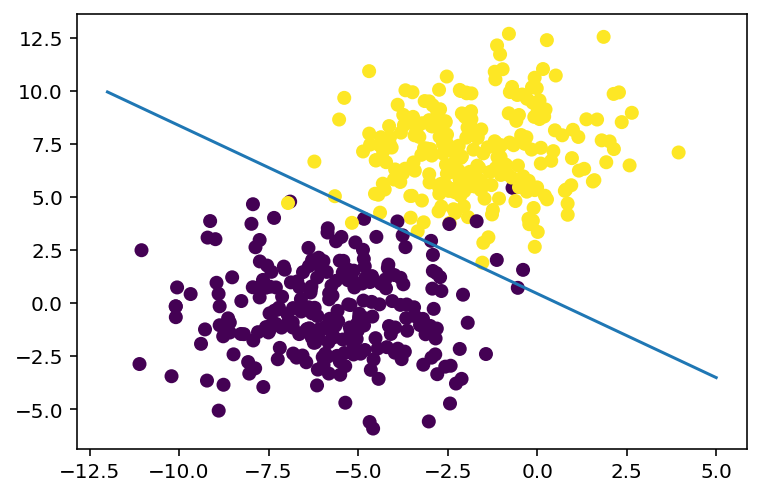

In [342]:
x_range = np.linspace(-12,5,50)
line = get_points_on_line(x_range, w_learnt)
plt.scatter(X_train[:,1], X_train[:,2], c=y_train)
plt.plot(x_range, line)